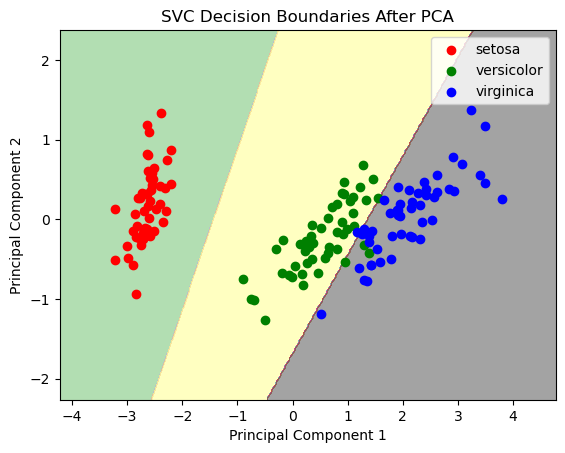

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train an SVC model
model = SVC(kernel='linear', C=2)
model.fit(X_reduced, y)

# Create a meshgrid for visualization
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
h = 0.02  # Define the step size for the meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the trained classifier to predict the class labels for points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.6)

# Plot data points
colors = ['red', 'green', 'blue']
for c, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], c=c, label=target)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Decision Boundaries After PCA')
plt.legend()
plt.show()